In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.shape

(1030, 9)

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
X = df.drop(columns = ['Strength'])
y = df.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [10]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314852

In [11]:
lr = LinearRegression()

np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628633

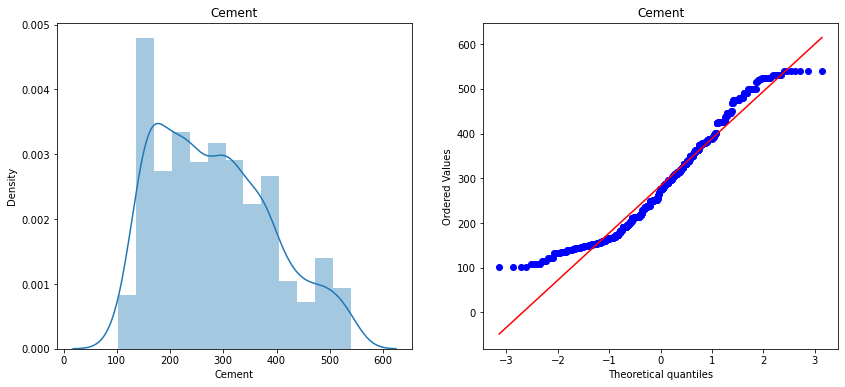

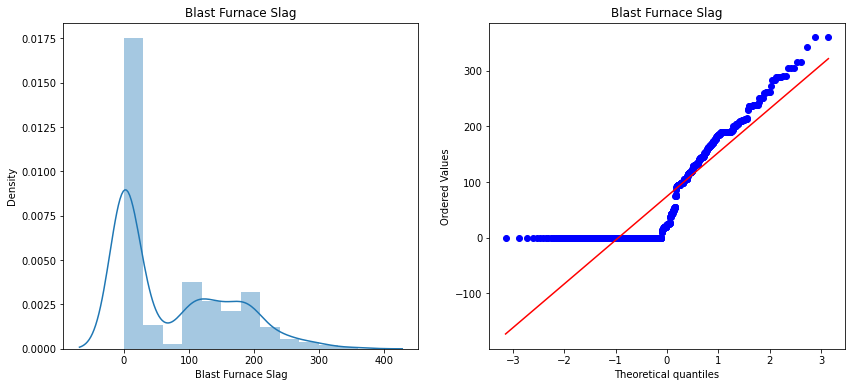

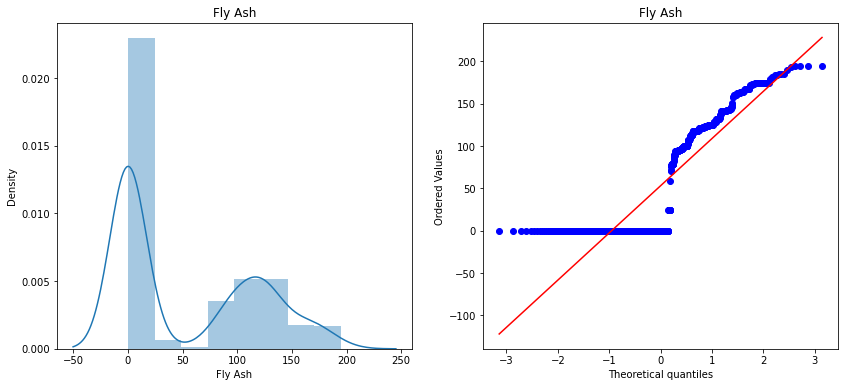

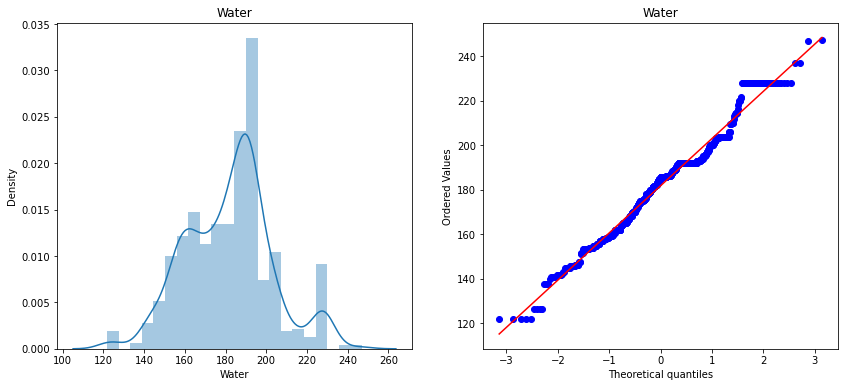

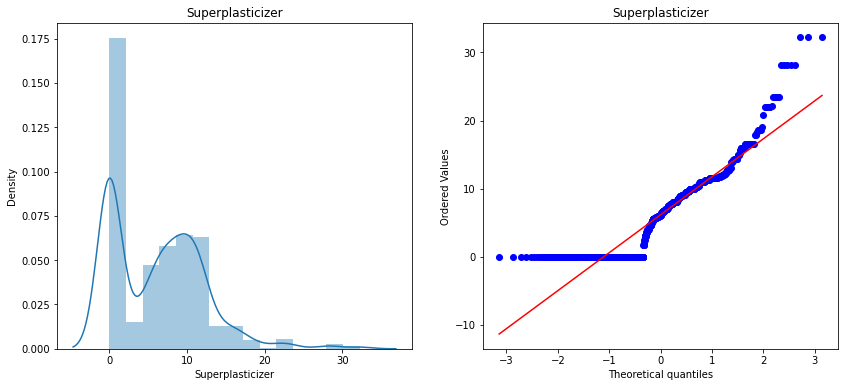

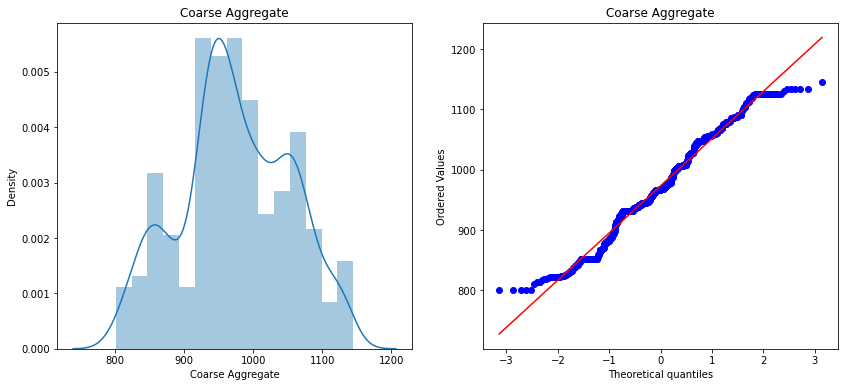

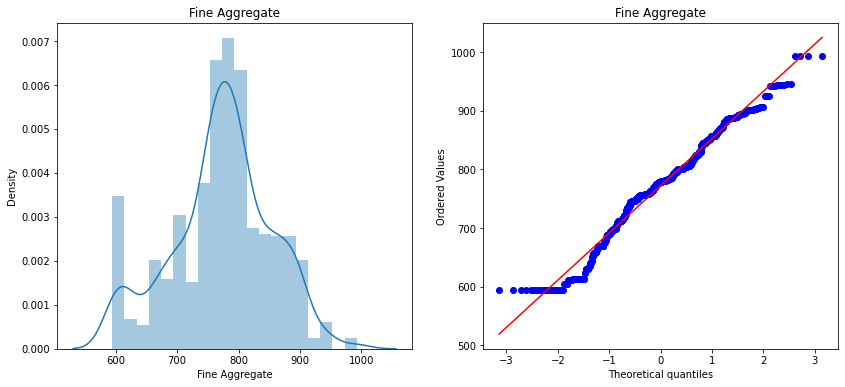

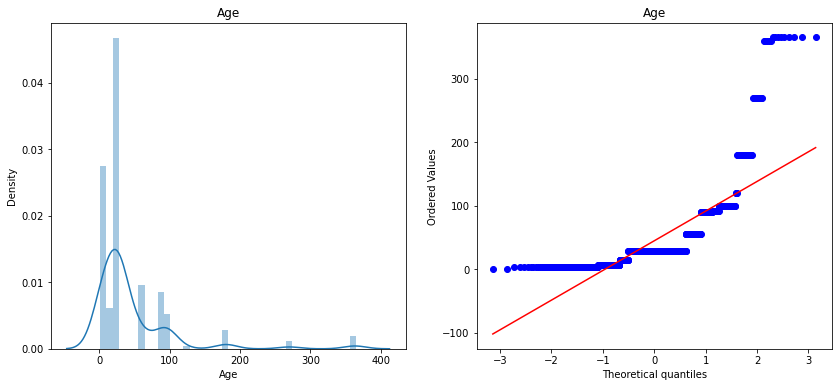

In [12]:
for col in X_train.columns:
    
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)
    
    plt.show()

In [13]:
# applying Box - cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00001)
X_test_transformed = pt.transform(X_test+0.00001)


pd.DataFrame({'cols':X_train.columns, 'box-cox_lambdas':pt.lambdas_})

,cols,box-cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [14]:
X_train_transformed

array([[-1.27975148,  0.96070173,  1.12820284, ..., -0.26250008,
        -0.67756847,  0.1060097 ],
       [ 1.24470596,  0.67299781,  1.13907395, ..., -1.91272791,
        -0.3140622 ,  0.1060097 ],
       [ 0.07984236, -1.08475523,  1.13203814, ...,  1.01840672,
         0.02595744, -1.67596993],
       ...,
       [-0.84451727, -1.08475523,  1.13463171, ...,  1.34536665,
         0.29715694,  1.24673346],
       [ 1.56562351,  0.925921  , -0.88716424, ..., -1.53725479,
         0.0762111 ,  0.1060097 ],
       [ 0.42655631, -1.08475523,  1.12599069, ..., -0.62083414,
         0.0951082 ,  0.1060097 ]])

In [15]:
lr = LinearRegression()

lr.fit(X_train_transformed,y_train)

y_pred1 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred1)

0.8054599377211108

In [16]:
lr = LinearRegression()
X_transformed = pt.fit_transform(X+0.00001)

np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6668489653763874

In [17]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed,columns=X_test.columns)

In [18]:
X_train_transformed 

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.960702,1.128203,-0.301920,0.919073,-0.262500,-0.677568,0.106010
1,1.244706,0.672998,1.139074,-0.165055,0.745745,-1.912728,-0.314062,0.106010
2,0.079842,-1.084755,1.132038,-1.047291,0.791178,1.018407,0.025957,-1.675970
3,-0.145641,0.894884,1.092185,0.581224,0.727899,-1.750779,0.583253,0.106010
4,-1.131044,0.769285,1.134025,-1.105297,0.817461,1.368575,0.262623,-1.675970
...,...,...,...,...,...,...,...,...
819,0.183601,1.007172,-0.887164,-1.769923,0.828524,0.390563,0.358776,-1.675970
820,-0.198733,-1.084755,1.134565,-1.839129,0.849638,1.445973,0.322797,-0.475625
821,-0.844517,-1.084755,1.134632,-0.706089,0.791178,1.345367,0.297157,1.246733
822,1.565624,0.925921,-0.887164,-0.019311,0.759365,-1.537255,0.076211,0.106010


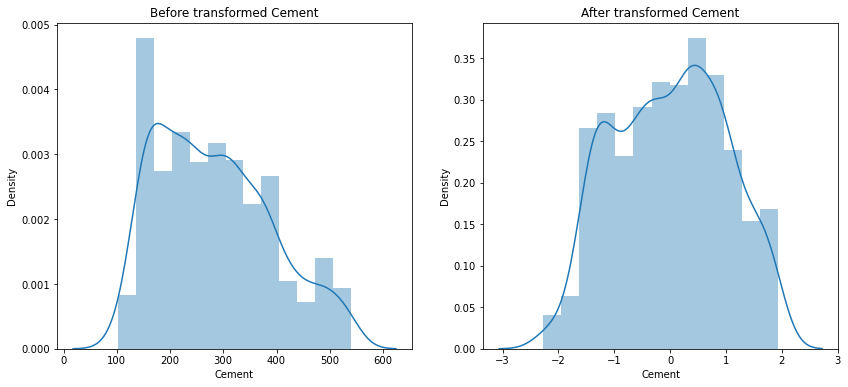

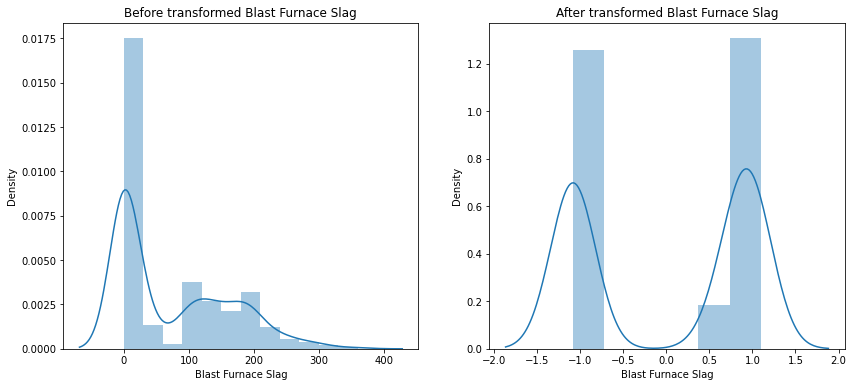

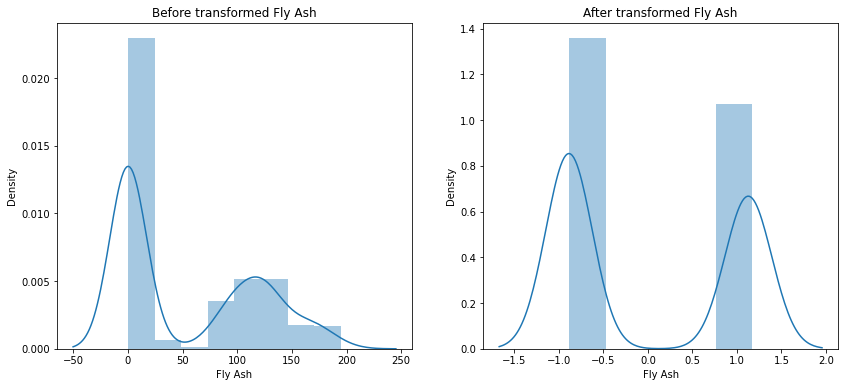

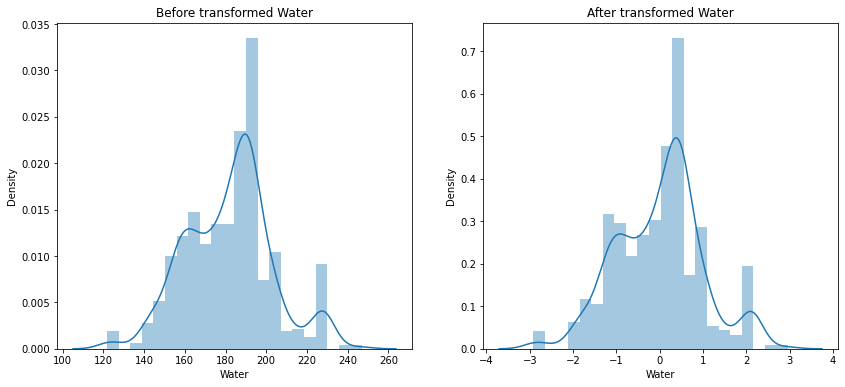

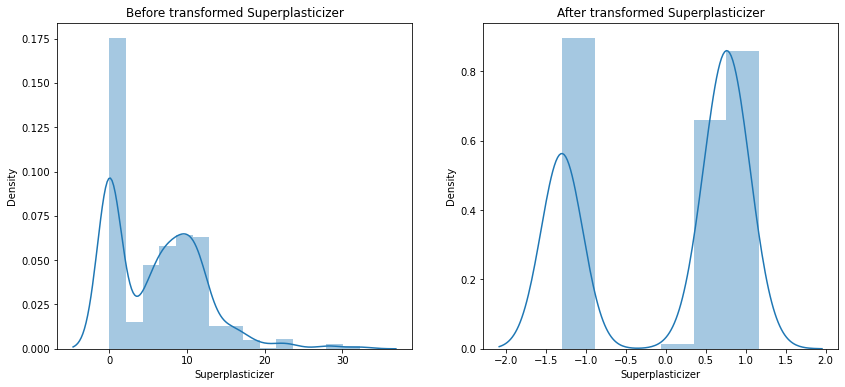

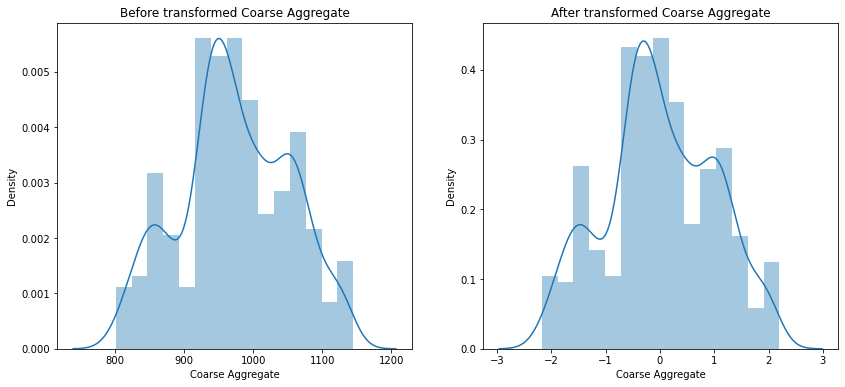

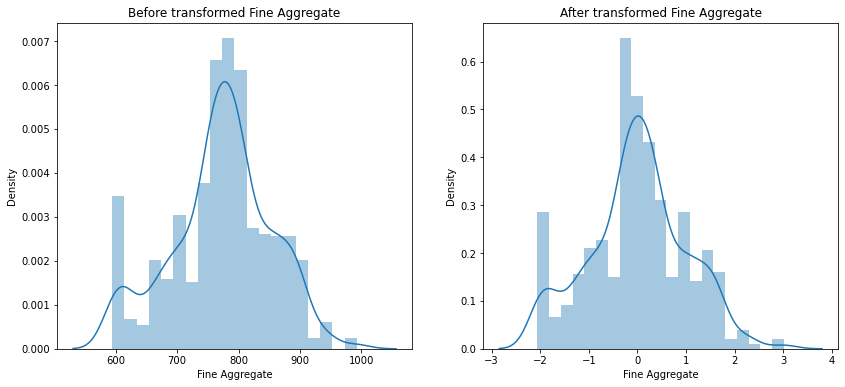

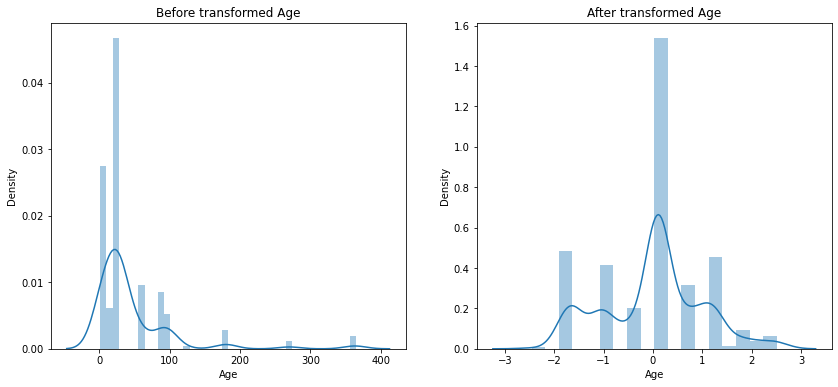

In [19]:
for col in X_train.columns:
    
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title('Before transformed ' + col)
    
    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title('After transformed ' + col)
    
    plt.show()

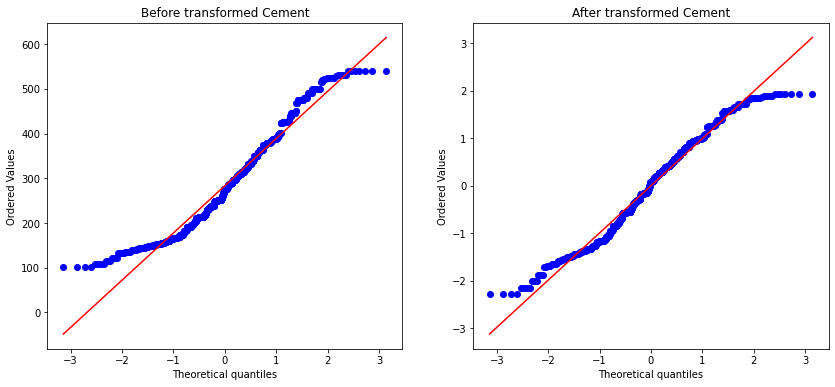

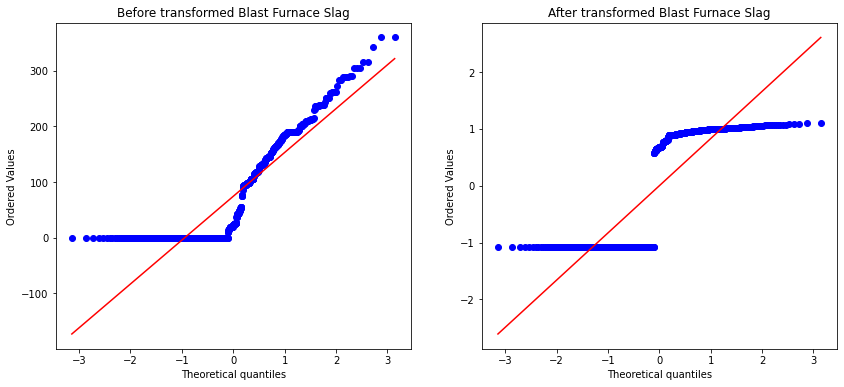

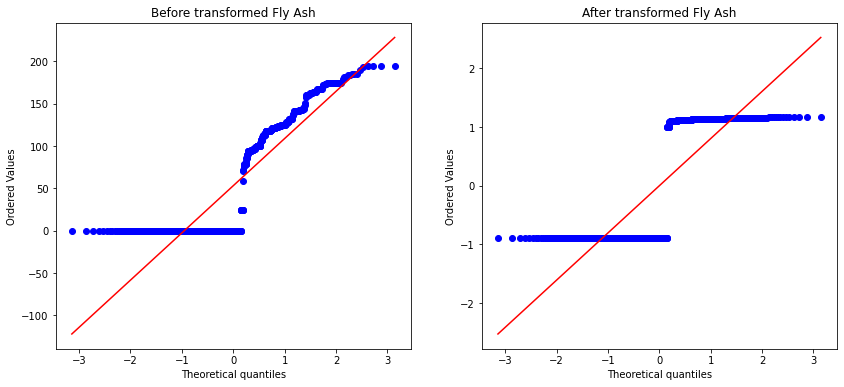

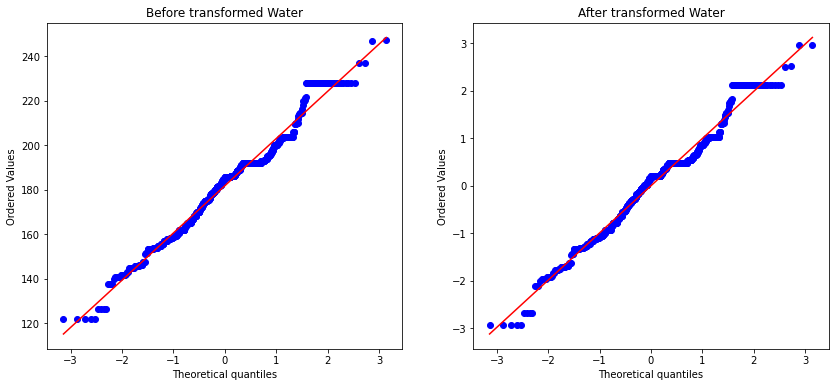

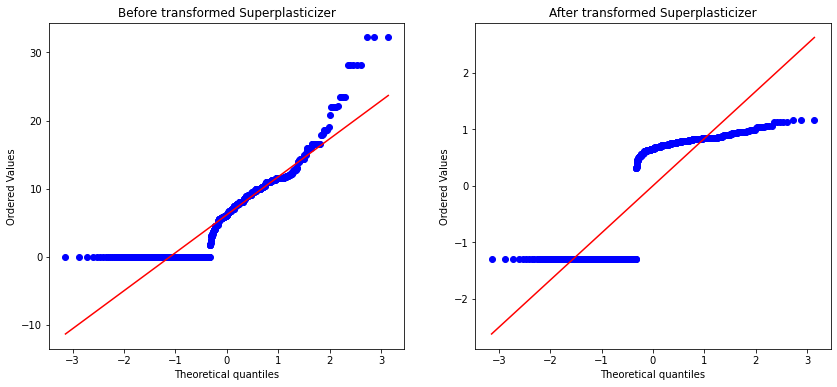

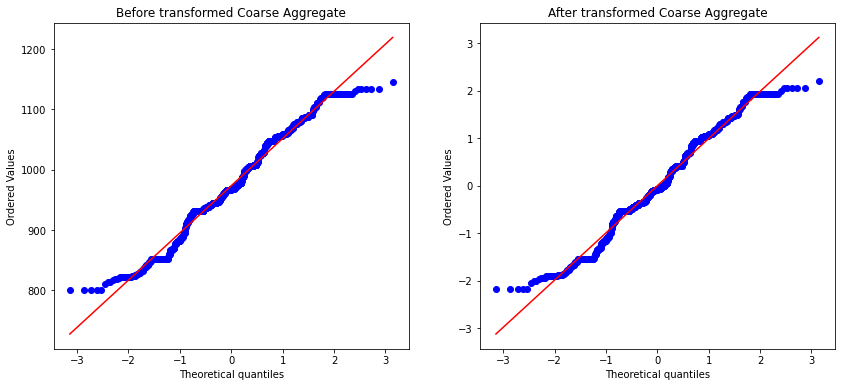

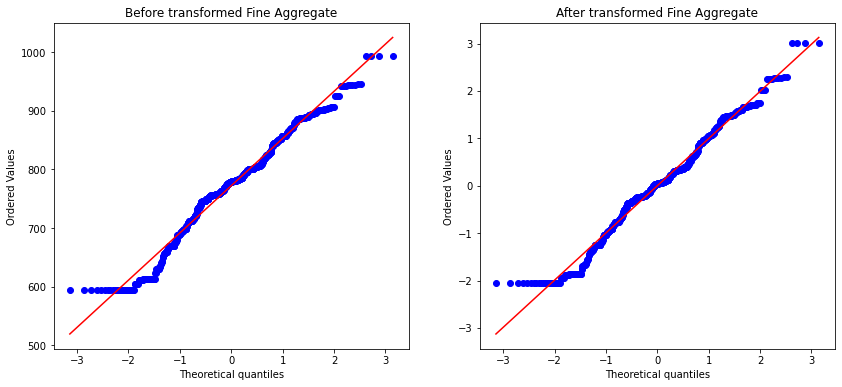

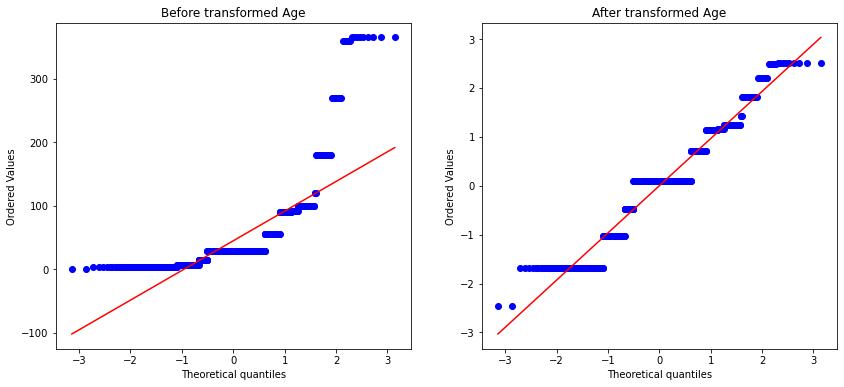

In [20]:
for col in X_train.columns:
    
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title('Before transformed ' + col)
    
    plt.subplot(122)
    stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
    plt.title('After transformed ' + col)
    
    plt.show()

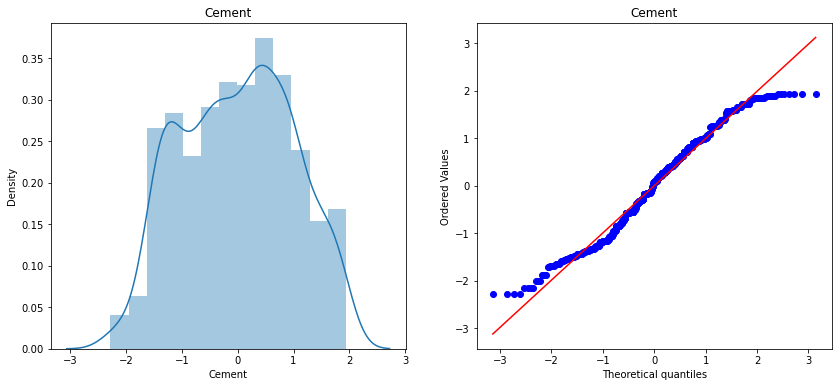

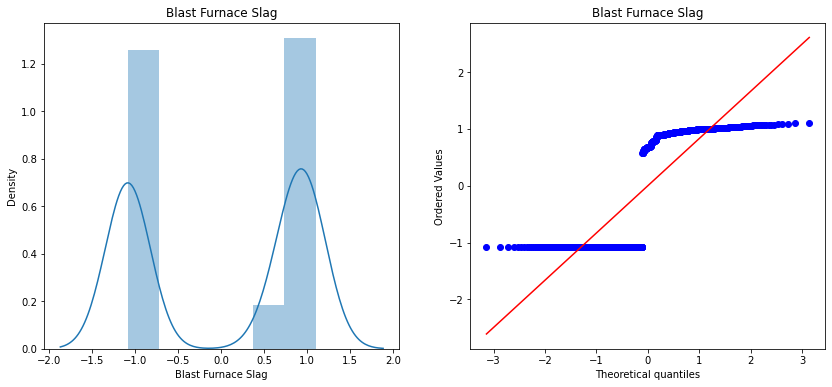

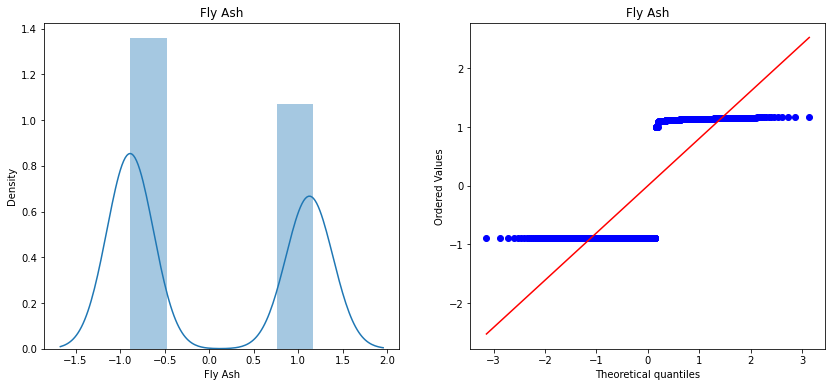

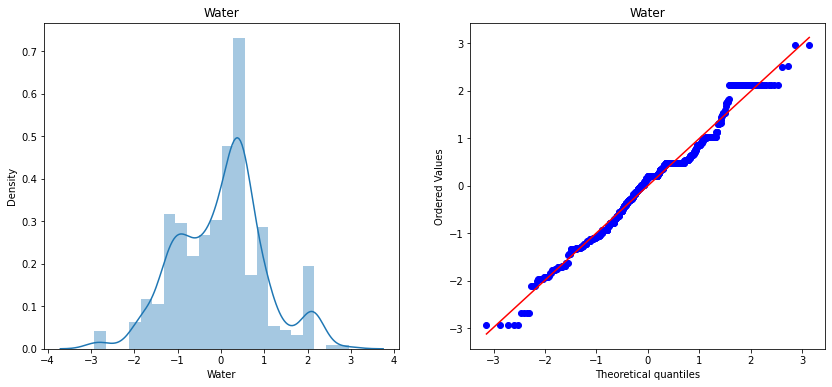

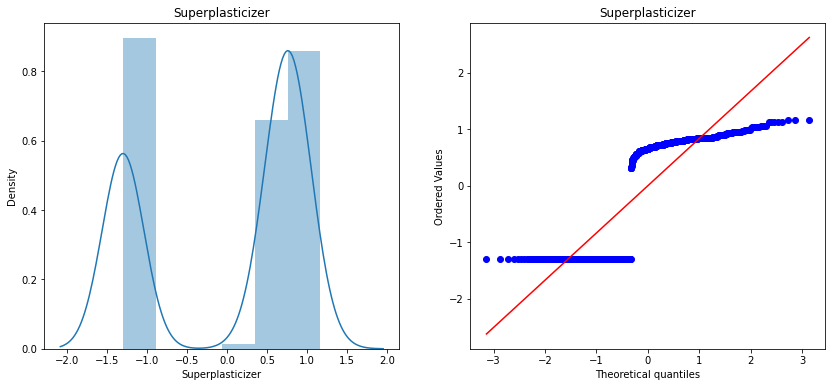

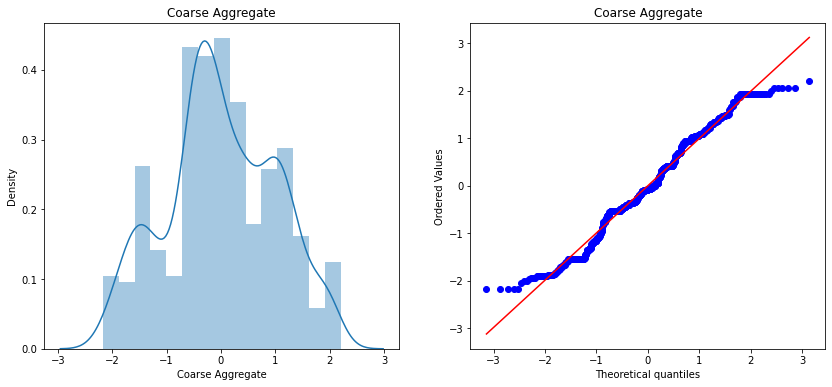

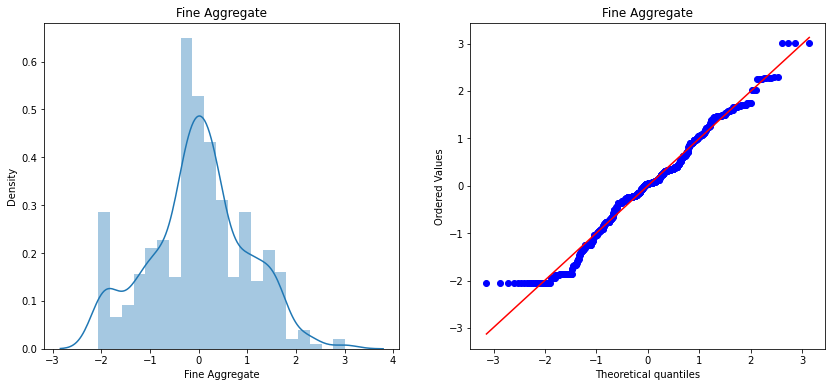

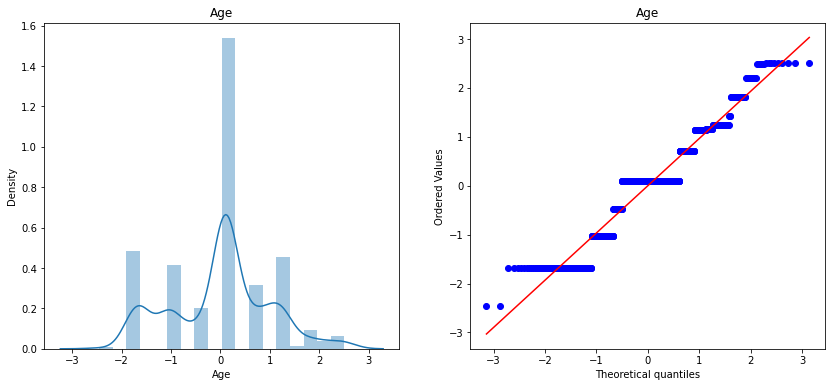

In [21]:
for col in X_train_transformed.columns:
    
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    sns.distplot(X_train_transformed[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
    plt.title(col)
    
    plt.show()

In [22]:
# applying Yeo-Johnson Transform

pt1 = PowerTransformer()

X_train_transformed1 = pt1.fit_transform(X_train+0.00001)
X_test_transformed1 = pt1.transform(X_test+0.00001)


pd.DataFrame({'cols':X_train.columns, 'Yeo-Johnson_lambdas':pt1.lambdas_})

,cols,Yeo-Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253934
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [23]:
lr = LinearRegression()

lr.fit(X_train_transformed1,y_train)

y_pred1 = lr.predict(X_test_transformed1)

r2_score(y_test,y_pred1)

0.8161906747993164

In [24]:
lr = LinearRegression()
X_transformed1 = pt.fit_transform(X+0.00001)

np.mean(cross_val_score(lr,X_transformed1,y,scoring='r2'))

0.6668489653763874

In [25]:
X_train_transformed1 = pd.DataFrame(X_train_transformed1,columns=X_train.columns)
X_test_transformed1 = pd.DataFrame(X_test_transformed1,columns=X_test.columns)

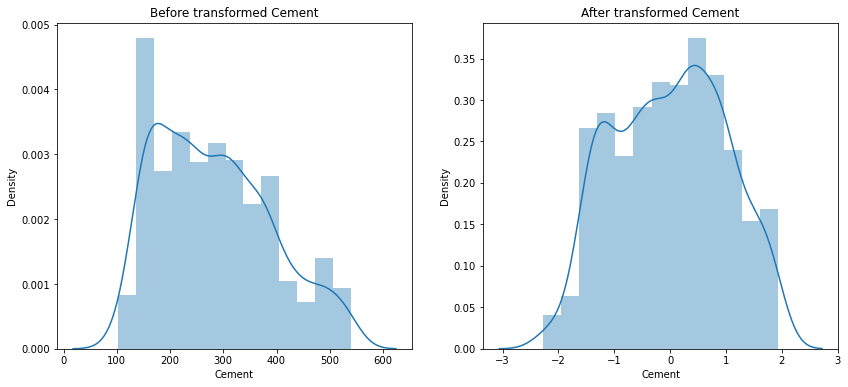

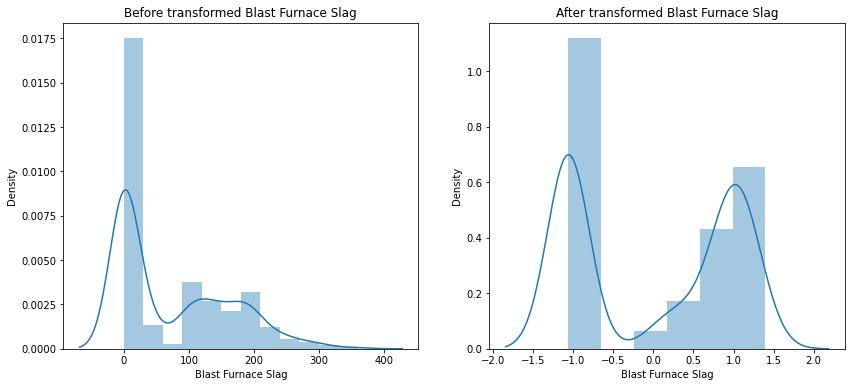

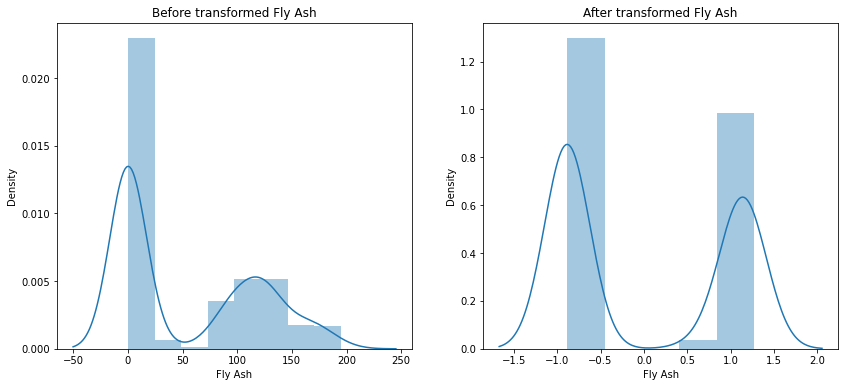

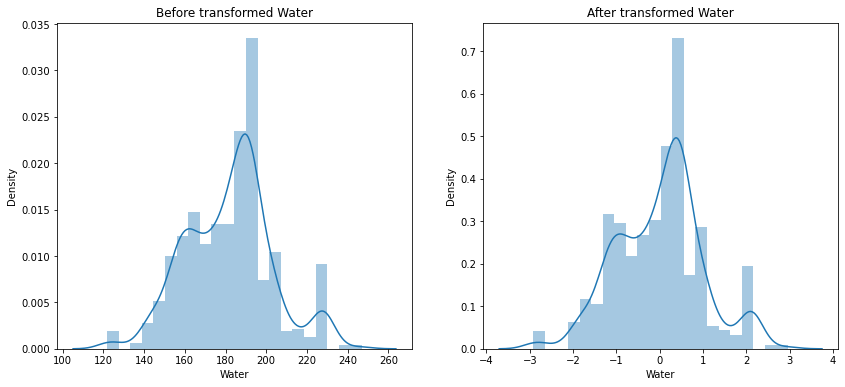

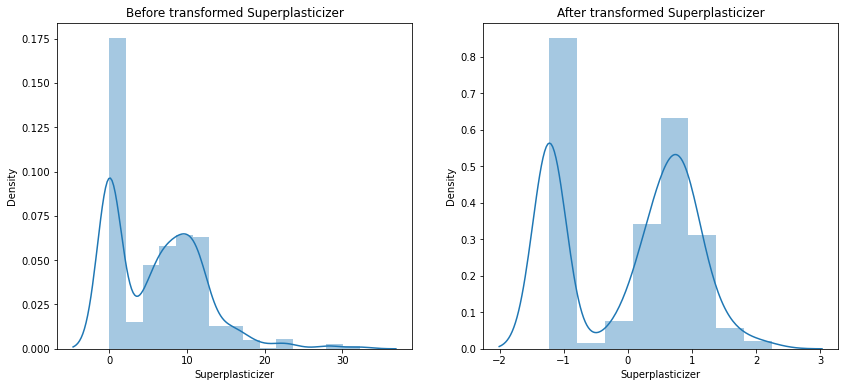

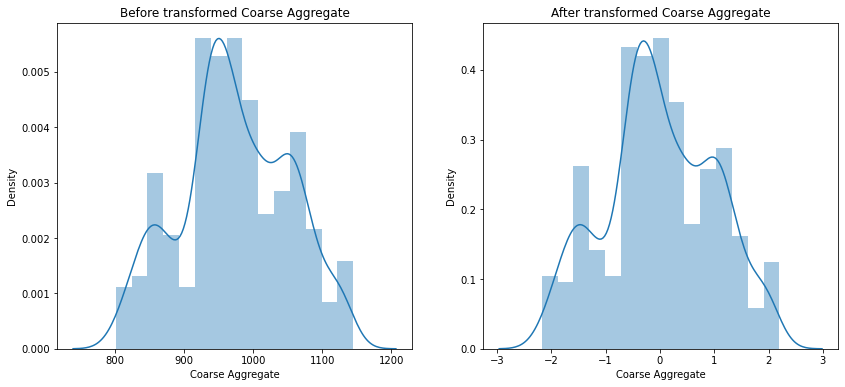

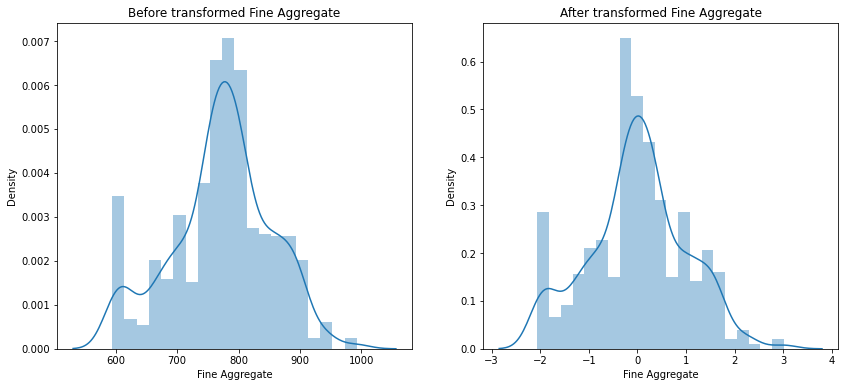

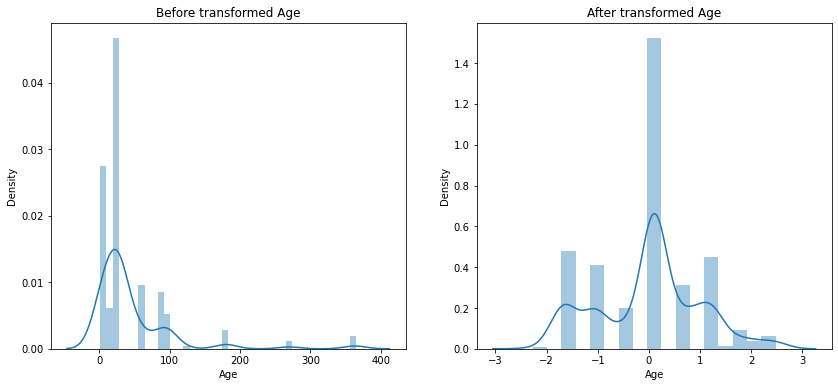

In [26]:
for col in X_train.columns:
    
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title('Before transformed ' + col)
    
    plt.subplot(122)
    sns.distplot(X_train_transformed1[col])
    plt.title('After transformed ' + col)
    
    plt.show()

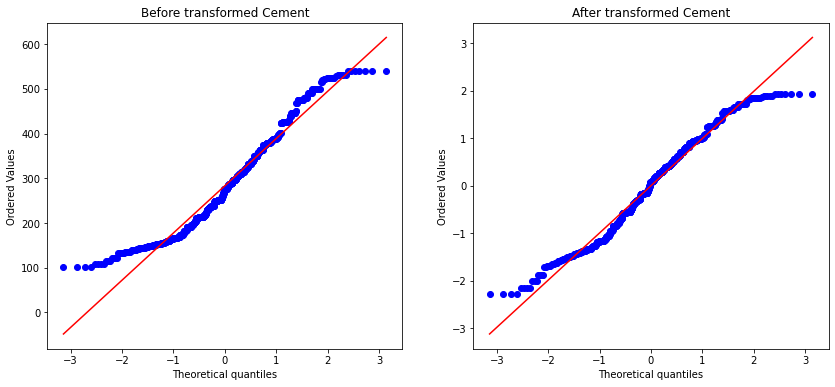

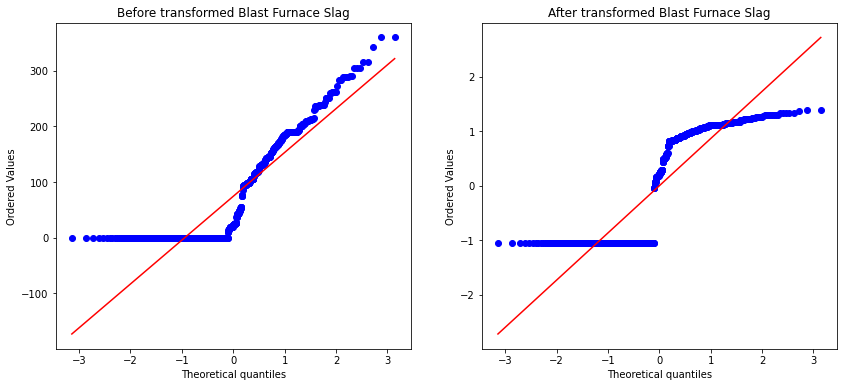

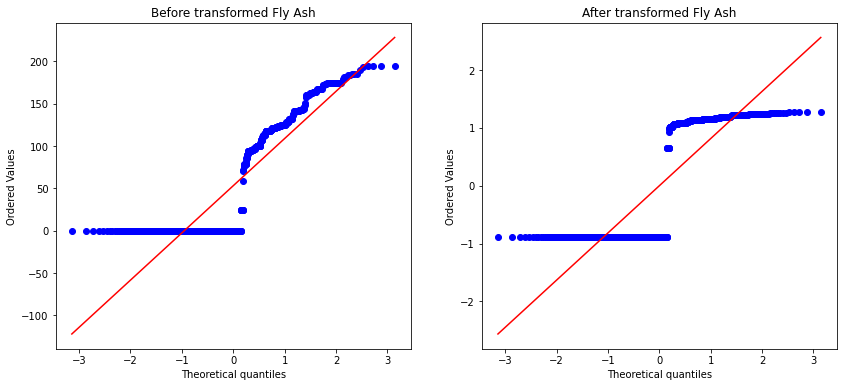

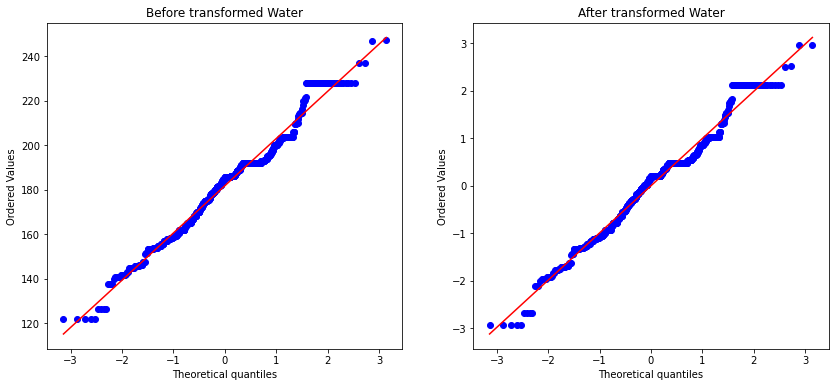

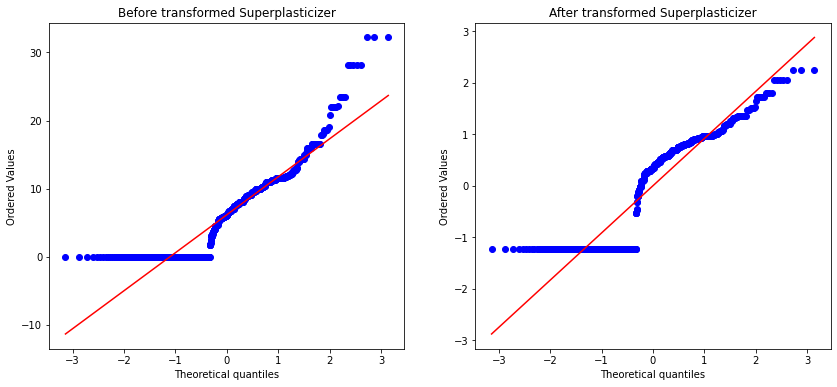

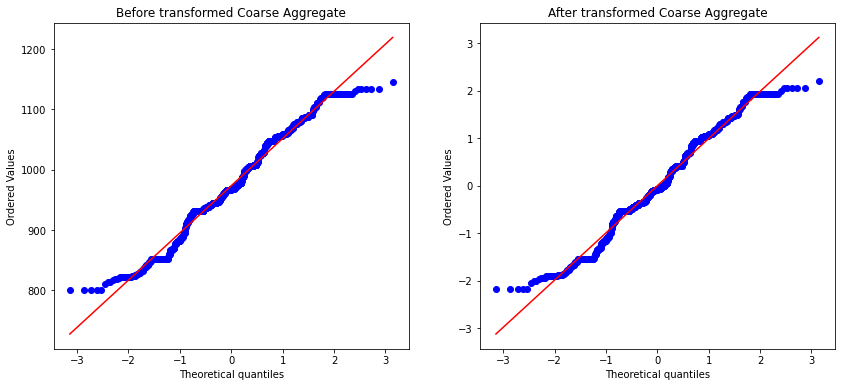

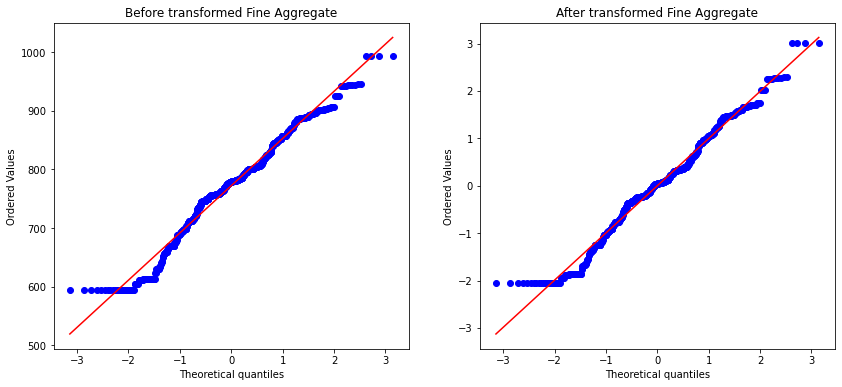

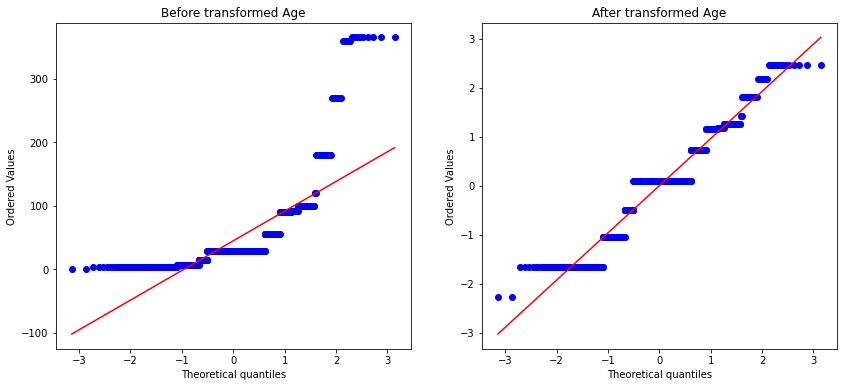

In [27]:
for col in X_train.columns:
    
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title('Before transformed ' + col)
    
    plt.subplot(122)
    stats.probplot(X_train_transformed1[col],dist='norm',plot=plt)
    plt.title('After transformed ' + col)
    
    plt.show()

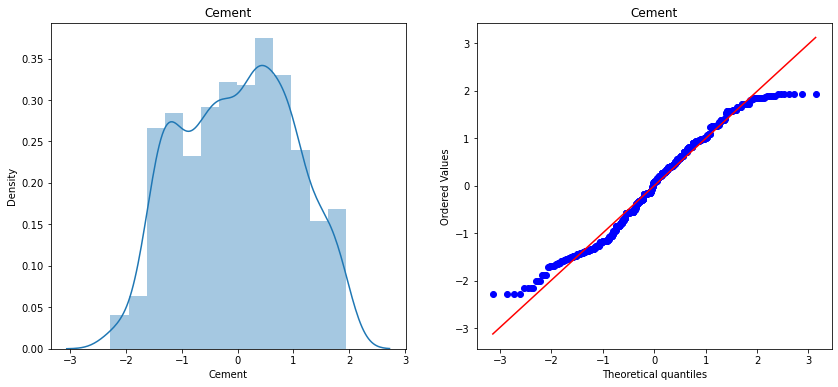

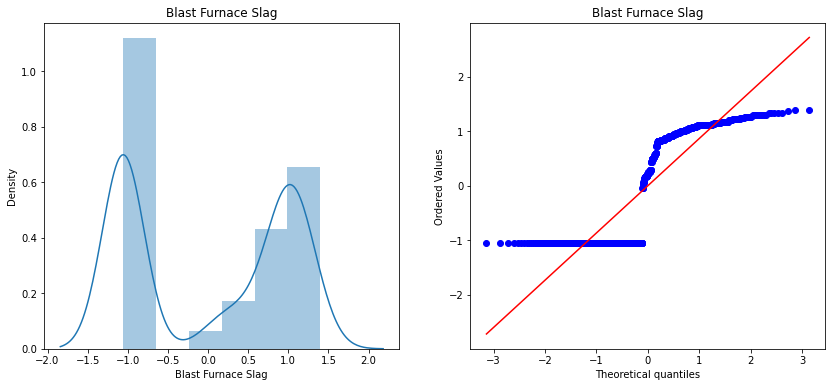

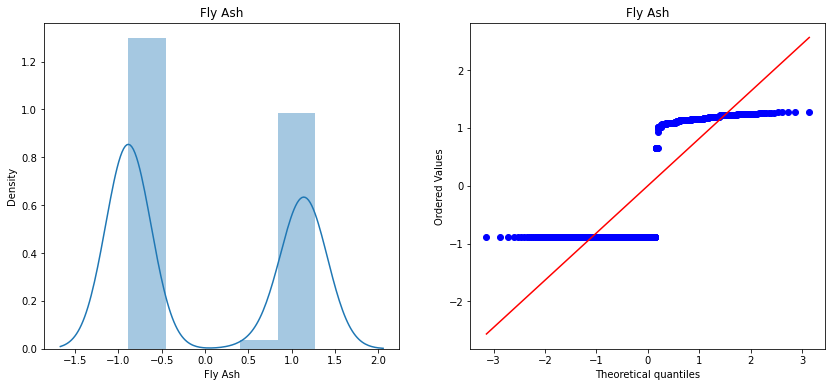

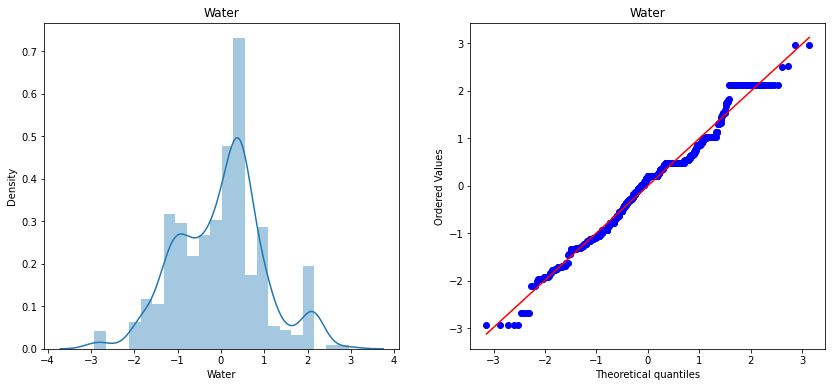

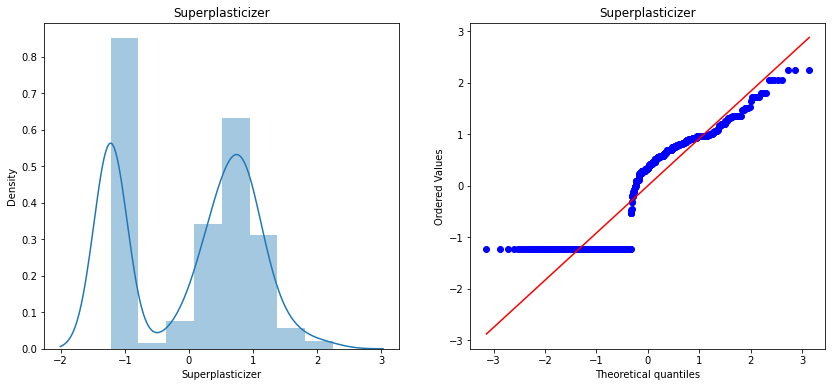

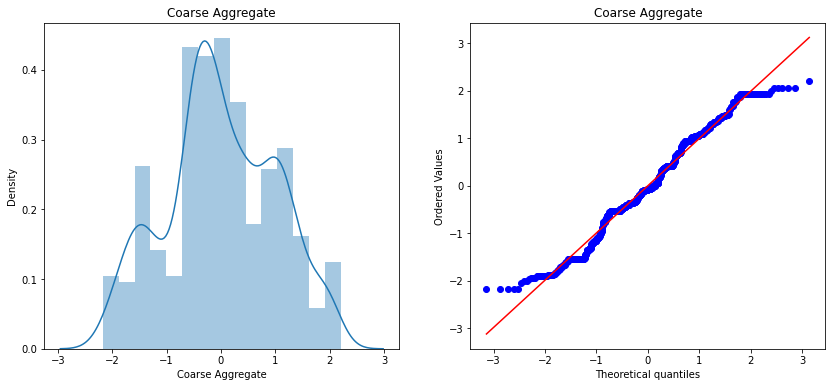

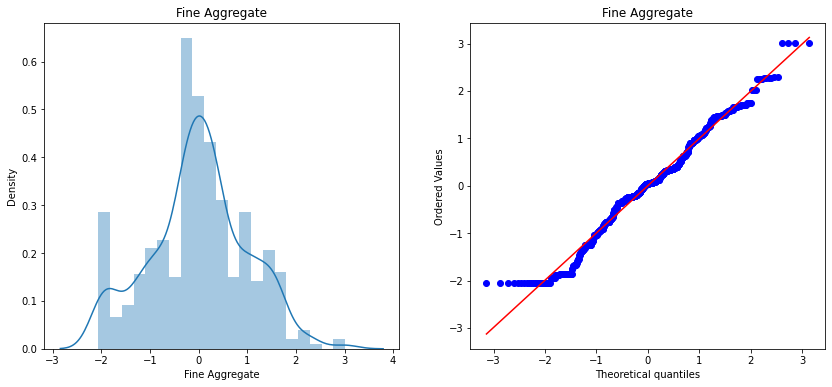

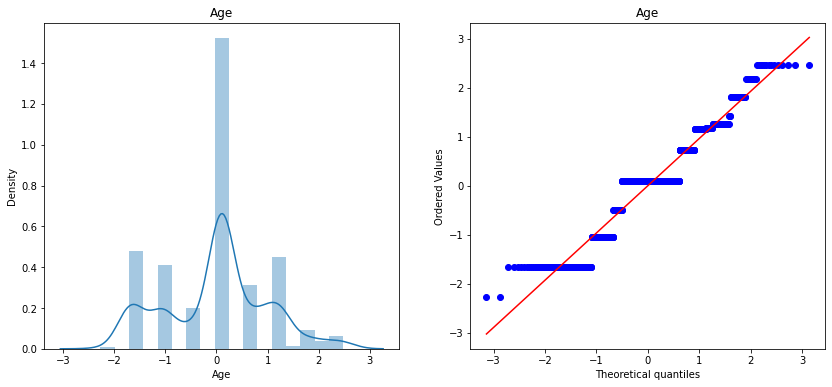

In [28]:
for col in X_train_transformed1.columns:
    
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    sns.distplot(X_train_transformed1[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train_transformed1[col],dist='norm',plot=plt)
    plt.title(col)
    
    plt.show()

In [29]:
pd.DataFrame({'cols':X_train.columns, 'box-cox_lambdas':pt.lambdas_,'Yeo-Johnson_lambdas':pt1.lambdas_})

,cols,box-cox_lambdas,Yeo-Johnson_lambdas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.028052,0.015715
2,Fly Ash,-0.037072,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.114979,0.253934
5,Coarse Aggregate,1.129168,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885
